<a href="https://colab.research.google.com/github/santhoshbvsrk/CapstoneProjects/blob/main/DataAnalytics_CDF/InsaidTelecom_CDFCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

*  As the dataset is huge, we'll zip it, upload the zip file to google drive and mount your google drive to colab, unzip it to access data from your colab.


*   Import the drive package from google.colab library to mount your google drive on to google colab.





In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




*   Once mounting is completed, mention the path of your zip file which contains the data to read.

In [2]:
!unzip gdrive/My\ Drive/CDF_Capstone_Project/events_data.zip

Archive:  gdrive/My Drive/CDF_Capstone_Project/events_data.zip
replace events_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n




*   Once mounting and unzipping is completed successfully, you should be able to see the zip file contains in your colab folder.


In [3]:
import pandas as pd 
import numpy as np

In [4]:
pd.set_option('display.float_format', lambda x: '%18f' %x)

In [5]:
events_data_df=pd.read_csv("events_data.csv")
events_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.000000,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4734221357723754496.000000,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3264499652692492800.000000,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5731369272434022400.000000,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,338888002570799936.000000,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [6]:
#storing records where device_id is missing
device_data = events_data_df[events_data_df.device_id.isnull()]

In [7]:
device_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 2055 to 3250939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   453 non-null    int64  
 1   device_id  0 non-null      float64
 2   timestamp  453 non-null    object 
 3   longitude  453 non-null    float64
 4   latitude   453 non-null    float64
 5   city       453 non-null    object 
 6   state      453 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 28.3+ KB


Installing mysql connector for python

In [8]:
pip install mysql-connector-python-rf

import package to connect to mysql and loading data from tables to dataframes

In [9]:
import mysql.connector

#this is to connect to mysql database
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database="Capstone1"
)

#declaring a cursor variable of database to hold data of a specific table
mycursor = mydb.cursor()

#mycursor variable holds the entire data from gender_age_train table
mycursor.execute("SELECT * FROM gender_age_train")

#using fetchall function to get data from cursor and populating in another variable
myresult = mycursor.fetchall()

#inserting table data from variable into a dataframe
gender_age_train_df = pd.DataFrame(myresult,columns=['device_id','Gender','Age','Age_Group'])

#mycursor variable holds the entire data from phone_brand_device_model table
mycursor.execute("SELECT * FROM phone_brand_device_model")

#using fetchall function to get data from cursor and populating in another variable, this overwrites data from previous load
myresult = mycursor.fetchall()

#inserting table data from variable into a dataframe
phone_brand_device_model_df = pd.DataFrame(myresult,columns=['device_id','Brand','Model'])

#printing sample data from the dataframes
print("Data from Gender_Age_Train Table")
print("---------------------------------")
print(gender_age_train_df.head())
print("**************************************")
print("\n")
print("Data from Phone_Brand_Device_Model Table")
print("-----------------------------------------")
print(phone_brand_device_model_df.head())
print("**************************************")

Data from Gender_Age_Train Table
---------------------------------
             device_id Gender  Age Age_Group
0 -8076087639492063270      M   35    M32-38
1 -2897161552818060146      M   35    M32-38
2 -8260683887967679142      M   35    M32-38
3 -4938849341048082022      M   30    M29-31
4   245133531816851882      M   30    M29-31
**************************************


Data from Phone_Brand_Device_Model Table
-----------------------------------------
             device_id Brand    Model
0  1877775838486905855  vivo      Y13
1 -3766087376657242966    小米     V183
2 -6238937574958215831  OPPO      R7s
3  8973197758510677470    三星    A368t
4 -2015528097870762664    小米  红米Note2
**************************************


In [10]:
events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [11]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   Gender     74645 non-null  object
 2   Age        74645 non-null  int64 
 3   Age_Group  74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [12]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  87726 non-null  int64 
 1   Brand      87726 non-null  object
 2   Model      87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [13]:
#check for missing values
events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [14]:
#check for missing values
gender_age_train_df.isnull().sum()

device_id    0
Gender       0
Age          0
Age_Group    0
dtype: int64

In [15]:
#check for missing values
phone_brand_device_model_df.isnull().sum()

device_id    0
Brand        0
Model        0
dtype: int64

# Data Pre-processing

In [16]:
events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [17]:
events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

## Imputing missing values in "device_id"

In [18]:
events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [19]:
events_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.000000,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4734221357723754496.000000,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3264499652692492800.000000,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5731369272434022400.000000,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,338888002570799936.000000,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [20]:
#Preparing list of unique latitude values for the missing deviceid records.
latlon_df = events_data_df[events_data_df.device_id.isnull()]['latitude'].unique()

In [21]:
latlon_df

array([22.814519, 26.948689, 26.960796, 22.777781, 31.561747, 18.628057,
       18.566925, 17.805195, 28.719966, 18.614812, 13.153332, 13.149176,
       28.721053, 17.752819, 22.817526, 17.822906, 26.95399 , 13.189053,
       21.194283, 21.790693, 28.728888])

In [22]:
#For imputing Missing values in DeviceId, we've fetched unique latitude for the missing deviceid and found that for that latitude there is only one deviceid throughout the dataset.
#Hence, we'll be imputing missing deviceid values by replacing the deviceid which the same latitudeid shares
for latitude in latlon_df:
  devid = list(events_data_df[(events_data_df.latitude == latitude) & (events_data_df.device_id.notnull())].device_id)[0]
  print('Latitude is {} for DeviceID: {}'.format(devid,latitude))
  events_data_df.loc[events_data_df.latitude == latitude, 'device_id'] = devid

Latitude is 3.1328613559497626e+18 for DeviceID: 22.814519
Latitude is -9.177251100412943e+17 for DeviceID: 26.948689
Latitude is -8.460337302442786e+18 for DeviceID: 26.960796
Latitude is 7.597735768595925e+18 for DeviceID: 22.777781
Latitude is 1.750778632182067e+18 for DeviceID: 31.561746999999997
Latitude is 9.027085705222633e+18 for DeviceID: 18.628057
Latitude is 8.539870903150472e+18 for DeviceID: 18.566925
Latitude is 6.844192269280791e+18 for DeviceID: 17.805195
Latitude is 5.098778421671838e+18 for DeviceID: 28.719966000000003
Latitude is 1.771585711650787e+17 for DeviceID: 18.614812
Latitude is 5.731369272434022e+18 for DeviceID: 13.153332
Latitude is 7.66213914371992e+18 for DeviceID: 13.149176
Latitude is 3.724654925765159e+18 for DeviceID: 28.721053
Latitude is -3.1309031770761733e+18 for DeviceID: 17.752819
Latitude is -2.399250255599833e+18 for DeviceID: 22.817526
Latitude is 6.619714762103552e+18 for DeviceID: 17.822906
Latitude is 3.562355872640618e+18 for DeviceID: 2

In [23]:
#checking if device_id imputation is successful or not
events_data_df.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

## Imputing Missing values in "State"

In [24]:
#State wise count before imputing missing state values
events_data_df[(events_data_df.state == 'WestBengal') | (events_data_df.state == 'Karnataka') | (events_data_df.state == 'Gujarat') | (events_data_df.state == 'Bihar') | (events_data_df.state == 'Punjab') | (events_data_df.state == 'Kerala')]['state'].value_counts()

WestBengal    196161
Karnataka      99058
Gujarat        42881
Bihar          35472
Punjab         26195
Kerala         23148
Name: state, dtype: int64

In [25]:
#For imputing the missing values in State, we'll first find all their respecitve city values
city_list = list(events_data_df[events_data_df.state.isnull()].city.unique())

In [26]:
city_list

['Pune',
 'Visakhapatnam',
 'Indore',
 'Chennai',
 'Delhi',
 'Channapatna',
 'Jaipur',
 'Gangarampur',
 'Arambagh']

In [27]:
#Will loop over the above cities list, fetch it's relevant state value where state value is not null and then populate that to all the records where city value is matching with the city value from our list
for city in city_list:
  state = list(events_data_df[(events_data_df.city == city) & (events_data_df.state.notnull())].state)[0]
  print("State is {} for City {}".format(state,city))
  events_data_df.loc[events_data_df.city == city, 'state'] = state

State is Maharashtra for City Pune
State is AndhraPradesh for City Visakhapatnam
State is MadhyaPradesh for City Indore
State is TamilNadu for City Chennai
State is Delhi for City Delhi
State is Karnataka for City Channapatna
State is Rajasthan for City Jaipur
State is WestBengal for City Gangarampur
State is WestBengal for City Arambagh


In [28]:
#State wise count after imputing missing values
events_data_df[(events_data_df.state == 'WestBengal') | (events_data_df.state == 'Karnataka') | (events_data_df.state == 'Gujarat') | (events_data_df.state == 'Bihar') | (events_data_df.state == 'Punjab') | (events_data_df.state == 'Kerala')]['state'].value_counts()

WestBengal    196203
Karnataka      99072
Gujarat        42881
Bihar          35472
Punjab         26195
Kerala         23148
Name: state, dtype: int64

In [29]:
#checking for missing state values post updation
events_data_df.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

## Imputing missing values in "Latitude & Longitude"

In [30]:
#Check if device_id is null for those records which have missing values in latitude or longitude or not
events_data_df[(events_data_df.device_id.isnull()) & ((events_data_df.latitude.isnull()) | (events_data_df.longitude.isnull()))]

,event_id,device_id,timestamp,longitude,latitude,city,state


From this we can say that records which have null values in device_id have data in latitude & longitude columns.

In [31]:
#Replacing nan value in Device_id with NULL
#events_data_df['device_id'].fillna('NULL',inplace=True)

In [32]:
#Dropping device Id for now as the same device_id is present in multiple cities. Hence, imputing device_id based on latitude or longitude or city or state is not possible
#events_data_df.drop(events_data_df.index[events_data_df.device_id == 'NULL'],inplace=True)

In [33]:
#checking if all the Device_ID with Null values are deleted or not 
events_data_df[events_data_df.device_id == 'NULL']

,event_id,device_id,timestamp,longitude,latitude,city,state


In [34]:
#Check for missing values in events_data_set
events_data_df.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [35]:
#checking if latitude and longitude are null for the same set of records
events_data_df[(events_data_df.latitude.isnull()) & (events_data_df.longitude.isnull())]

,event_id,device_id,timestamp,longitude,latitude,city,state
8015,2929521,1779631023439405312.000000,2016-05-05 01:15:22,nan,nan,Delhi,Delhi
9697,1017749,-8790560034584249344.000000,2016-05-03 17:22:52,nan,nan,Indore,MadhyaPradesh
10949,2132415,4865606571395668992.000000,2016-05-07 19:57:06,nan,nan,Visakhapatnam,AndhraPradesh
16038,926804,7983871429718484992.000000,2016-05-03 12:29:47,nan,nan,Chennai,TamilNadu
20586,3074782,-7364840628879980544.000000,2016-05-04 19:39:28,nan,nan,Pune,Maharashtra
...,...,...,...,...,...,...,...
3226082,1955966,6774071338248978432.000000,2016-05-06 01:10:38,nan,nan,Moga,Punjab
3240057,2318768,1779631023439405312.000000,2016-05-06 09:22:44,nan,nan,Delhi,Delhi
3240304,2387314,-7364840628879980544.000000,2016-05-05 06:20:46,nan,nan,Pune,Maharashtra
3246545,2857050,4580179444377397760.000000,2016-05-07 14:25:41,nan,nan,Jaipur,Rajasthan


From this we can say that latitude & longitude are null for the same set of records.

In [36]:
events_data_df[(events_data_df.latitude.isnull()) & (events_data_df.longitude.isnull())].sort_values(by=['device_id'])

,event_id,device_id,timestamp,longitude,latitude,city,state
1954607,1670103,-8790560034584249344.000000,2016-05-01 09:35:01,nan,nan,Indore,MadhyaPradesh
2884578,763705,-8790560034584249344.000000,2016-05-04 08:55:07,nan,nan,Indore,MadhyaPradesh
785836,2151512,-8790560034584249344.000000,2016-05-07 11:41:40,nan,nan,Indore,MadhyaPradesh
1572025,3028339,-8790560034584249344.000000,2016-05-05 14:32:56,nan,nan,Indore,MadhyaPradesh
2291796,1622109,-8790560034584249344.000000,2016-05-04 21:16:19,nan,nan,Indore,MadhyaPradesh
...,...,...,...,...,...,...,...
118629,53798,7983871429718484992.000000,2016-05-04 18:34:29,nan,nan,Chennai,TamilNadu
600419,2419252,7983871429718484992.000000,2016-05-02 22:04:57,nan,nan,Chennai,TamilNadu
2047699,1840751,7983871429718484992.000000,2016-05-01 22:58:43,nan,nan,Chennai,TamilNadu
2843793,2128528,7983871429718484992.000000,2016-05-05 18:04:43,nan,nan,Chennai,TamilNadu


In [37]:
events_data_df[events_data_df.device_id == -8790560034584249344.000000][['city','state']].value_counts()

city    state        
Indore  MadhyaPradesh    810
dtype: int64

In [38]:
#checking if the device_id is different for the records where latitude & longitude are null
dev_id = events_data_df[(events_data_df.latitude.isnull()) & (events_data_df.longitude.isnull())].sort_values(by=['device_id'])['device_id'].unique()

In [39]:
dev_id

array([-8.79056003e+18, -7.36484063e+18, -6.03379839e+18,  3.05848775e+17,
        1.32005098e+18,  1.77963102e+18,  2.35097940e+18,  3.09916855e+18,
        3.73828049e+18,  4.37503983e+18,  4.58017944e+18,  4.78258205e+18,
        4.86560657e+18,  5.11518528e+18,  5.37559902e+18,  5.51865960e+18,
        5.73136927e+18,  6.77407134e+18,  7.01860038e+18,  7.66213914e+18,
        7.98387143e+18])

In [40]:
#checking how many records does each device_id has to update for latitude & longitude
events_data_df[(events_data_df.latitude.isnull()) & (events_data_df.longitude.isnull())].sort_values(by=['device_id'])['device_id'].value_counts()

305848775386534912.000000      22
4375039830232869888.000000     22
4580179444377397760.000000     22
1779631023439405312.000000     21
7018600380123445248.000000     21
5731369272434022400.000000     21
4782582047729166336.000000     21
5115185276392512512.000000     21
5375599021847303168.000000     21
5518659601894557696.000000     21
2350979402202438656.000000     21
3738280493453803008.000000     21
4865606571395668992.000000     21
-7364840628879980544.000000    21
7983871429718484992.000000     21
-8790560034584249344.000000    21
-6033798388179802112.000000    21
7662139143719919616.000000     21
3099168546198768640.000000     14
6774071338248978432.000000     14
1320050977019711232.000000     14
Name: device_id, dtype: int64

In [41]:
#noting down the count for a sample device to check later if the count is increasing post updation for missing values
events_data_df[events_data_df.device_id == 305848775386534912.000000][['latitude','longitude']].value_counts()

latitude   longitude
26.987566  75.865534    560
dtype: int64

* From the above cell we see that for device_id == 305848775386534912.000000 latitude & longitude is present in 560 records.
* From the above cells we see that for device_id == 305848775386534912.000000 latitude & longitude are null for 22 records.
* So, post updating latitude & longitude for  device_id == 305848775386534912.000000 total number of records with latitude & longitude populated should be 582.

In [42]:
#Imputing missing values in latitude & longitude
#From the previous steps we found that there are 21 device_ids for the missing latitude & longitude records.
#For these 21 device_ids there are unique latitude & longitude combination. Hence, we'll be replacing the missing latitude & longitude values for these devices with the same latitude & longitude values

for i in dev_id:
  lat = list(events_data_df[(events_data_df.device_id == i) & (events_data_df.latitude.notnull())].latitude)[0]
  lon = list(events_data_df[(events_data_df.device_id == i) & (events_data_df.latitude.notnull())].longitude)[0]
  city = list(events_data_df[events_data_df.device_id == i].city)[0]
  state = list(events_data_df[events_data_df.device_id == i].state)[0]
  print('For DeviceID {} Latitude is: {}, Longitude is: {}, city is: {} & State is: {}'.format(i,lat,lon,city,state))
  events_data_df.loc[events_data_df.device_id == i, 'latitude'] = lat
  events_data_df.loc[events_data_df.device_id == i, 'longitude'] = lon

For DeviceID -8.790560034584249e+18 Latitude is: 22.761965, Longitude is: 75.933778, city is: Indore & State is: MadhyaPradesh
For DeviceID -7.364840628879981e+18 Latitude is: 18.54074, Longitude is: 73.931944, city is: Pune & State is: Maharashtra
For DeviceID -6.033798388179802e+18 Latitude is: 17.816579, Longitude is: 83.31978699999998, city is: Visakhapatnam & State is: AndhraPradesh
For DeviceID 3.058487753865349e+17 Latitude is: 26.987565999999998, Longitude is: 75.865534, city is: Jaipur & State is: Rajasthan
For DeviceID 1.3200509770197112e+18 Latitude is: 26.211919, Longitude is: 87.570736, city is: Araria & State is: Bihar
For DeviceID 1.7796310234394053e+18 Latitude is: 28.738901, Longitude is: 77.235416, city is: Delhi & State is: Delhi
For DeviceID 2.3509794022024387e+18 Latitude is: 22.745063000000002, Longitude is: 75.888474, city is: Indore & State is: MadhyaPradesh
For DeviceID 3.0991685461987686e+18 Latitude is: 27.17739700000001, Longitude is: 84.1409, city is: Bagah

In [43]:
#checking for a sample device if the count has increased
events_data_df[events_data_df.device_id == 305848775386534912.000000][['latitude','longitude']].value_counts()

latitude   longitude
26.987566  75.865534    582
dtype: int64

In [44]:
#checking if we still have missing values in any column
events_data_df.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

## Handling Non-English characters in Phone Brand

In [50]:
phone_brand_device_model_df.Brand.value_counts()

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
        ...  
E人E本        1
瑞高          1
世纪星         1
西门子         1
恒宇丰         1
Name: Brand, Length: 116, dtype: int64

In [51]:
!pip3 uninstall googletrans==3.1.0a0

Uninstalling googletrans-3.1.0a0:
  Would remove:
    /usr/local/bin/translate
    /usr/local/lib/python3.7/dist-packages/googletrans-3.1.0a0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/googletrans/*
Proceed (y/n)? y
  Successfully uninstalled googletrans-3.1.0a0


In [51]:
!pip3 install googletrans==3.1.0a0

In [52]:
from googletrans import Translator, constants
#from pprint import pprint

In [53]:
# init the Google API translator
translator = Translator()

In [54]:
translation = translator.translate("三星", dest='en')
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

三星 (en) --> 三星 (en)


In [ ]:
translator = Translator()
translations = {}
brand_list = list(phone_brand_device_model_df.Brand.unique())

for Brand in brand_list:
  phone_brand_device_model_df.loc[phone_brand_device_model_df.Brand == Brand, 'latitude'] = translator.translate(Brand, dest='en').text
  print(translator.translate(Brand, dest='en').text)

In [ ]:
print(translator.translate("三星").text)

三星


In [ ]:
result = translator.translate("三星",src='zh-CN', dest="en")
print(f"{result.origin} ({result.src}) --> {result.text} ({result.dest})")

三星 (en) --> 三星 (en)


In [ ]:
list(phone_brand_device_model_df.Brand.unique())

In [ ]:
!pip install --upgrade google-cloud-translate

     |████████████████████████████████| 102kB 4.2MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
  Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Found existing installation: google-cloud-translate 1.5.0
    Uninstalling google-cloud-translate-1.5.0:
      Successfully uninstalled google-cloud-translate-1.5.0


In [ ]:
from google.cloud import translate

In [ ]:
from translate import translator

In [ ]:
result = translator(target='en',phrase="三星", source="zh-cn")

In [ ]:
result[0]

[['Samsung',
  '三星',
  None,
  None,
  3,
  None,
  None,
  [[None, None, None, None, None, None, None, True]],
  [[['676e6bfae35bd1f419abe83d5bb33621', 'offline_launch_doc.md']]]]]

In [ ]:
phone_brand_device_model_df.Brand.nunique()

116

In [ ]:
lang_dict = {'华为' : 'Huawei', 
             '小米' : 'Xiaomi',
             '三星' : 'Samsung',
             '魅族' : 'Meizu',
             '酷派' : 'Coolpad',
             '乐视' : 'LeEco',
             '联想' : 'Lenovo'}

phone_brand_device_model_df.Brand = phone_brand_device_model_df.Brand.apply(lambda x: lang_dict.setdefault(x,x))
phone_brand_device_model_df.sample(5)

In [ ]:
events_data_df[(events_data_df.latitude == 26.960796) | (events_data_df.longitude == 75.846007)][['device_id','city','state']].value_counts()

device_id                    city    state    
-8460337302442785792.000000  Jaipur  Rajasthan    525
dtype: int64

In [ ]:
events_data_df[events_data_df.device_id == '-8460337302442785792.000000']

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,-8460337302442785792.000000,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,-8460337302442785792.000000,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-8460337302442785792.000000,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,-8460337302442785792.000000,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,-8460337302442785792.000000,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3252945,2687452,-8460337302442785792.000000,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra
3252946,1051580,-8460337302442785792.000000,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra
3252947,1316227,-8460337302442785792.000000,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi
3252948,381262,-8460337302442785792.000000,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh


In [ ]:
events_data_df[(events_data_df.city=='Jaipur') & (events_data_df.state=='Rajasthan') & (events_data_df.device_id == '-8460337302442785792.000000')]

,event_id,device_id,timestamp,longitude,latitude,city,state
54,1888847,-8460337302442785792.000000,2016-05-02 15:52:42,75.863671,26.931170,Jaipur,Rajasthan
57,2342814,-8460337302442785792.000000,2016-05-04 16:26:56,75.813028,26.955495,Jaipur,Rajasthan
101,2787217,-8460337302442785792.000000,2016-05-07 19:29:03,75.867452,26.985617,Jaipur,Rajasthan
107,1856551,-8460337302442785792.000000,2016-05-05 15:27:28,75.841276,26.978374,Jaipur,Rajasthan
113,1752747,-8460337302442785792.000000,2016-05-04 16:58:47,75.861558,26.986656,Jaipur,Rajasthan
...,...,...,...,...,...,...,...
3252904,1044472,-8460337302442785792.000000,2016-05-06 17:40:53,75.861197,26.985418,Jaipur,Rajasthan
3252908,2603389,-8460337302442785792.000000,2016-05-07 00:32:29,75.885594,26.948387,Jaipur,Rajasthan
3252911,3113603,-8460337302442785792.000000,2016-05-01 12:38:05,75.835737,26.948521,Jaipur,Rajasthan
3252914,18399,-8460337302442785792.000000,2016-05-07 16:18:52,75.846714,26.989496,Jaipur,Rajasthan


In [ ]:
events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [ ]:
 events_data_df[events_data_df['state'].isnull()]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [ ]:
#events_data_df.fillna(0,inplace=True)  #filling all missing values with 0

In [ ]:
events_data_df[(events_data_df[events_data_df['longitude'].isnull()]) & (events_data_df[events_data_df['latitude'].isnull()])] #checking if it is the same records which have missing latitude & longitude values

In [ ]:
llat = 32.77
ulat = -1.49

llon = 66.18
ulon = 93.69

In [ ]:
events_data_df[(events_data_df.city == 'Visakhapatnam') & (events_data_df.state == 'AndhraPradesh')][['latitude','longitude']].value_counts()

latitude   longitude
17.829748  83.326714    2070
17.775418  83.373009    1644
17.757190  83.366564    1594
17.817945  83.384242    1490
17.816579  83.319787    1317
                        ... 
17.748306  83.336540       1
17.769770  83.341861       1
17.749928  83.363726       1
17.762473  83.334313       1
17.800646  83.367603       1
Length: 1550, dtype: int64

In [ ]:
events_data_df[events_data_df.state.isnull()]['city'].value_counts()

Series([], Name: city, dtype: int64)

From among the above missing States we are concerned about 3 cities which are part of the 6 states we are supposed to work on which are:
* Arambagh ---> WestBengal
* Channapatna ---> Karnataka
* Gangarampur ---> WestBengal

Filtering out events_data for only 6 states as per the requirement given i.e., WestBengal, Karnataka, Gujarat, Bihar, Punjab & Kerala.

In [ ]:
events_data_filtered_df= events_data_df[(events_data_df.state == 'WestBengal') | (events_data_df.state == 'Karnataka') | (events_data_df.state == 'Gujarat') | (events_data_df.state == 'Bihar') | (events_data_df.state == 'Punjab') | (events_data_df.state == 'Kerala')]

In [ ]:
events_data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422971 entries, 1 to 3252921
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422971 non-null  int64  
 1   device_id  422923 non-null  float64
 2   timestamp  422971 non-null  object 
 3   longitude  422929 non-null  float64
 4   latitude   422929 non-null  float64
 5   city       422971 non-null  object 
 6   state      422971 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 25.8+ MB


In [ ]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   Gender     74645 non-null  object
 2   Age        74645 non-null  int64 
 3   Age_Group  74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
events_data_filtered_df.isna().sum()

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

Dropping Null values w.r.t Device_id, latitude & longitude.

In [ ]:
events_data_filtered_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
events_data_filtered_df['device_id'] = events_data_filtered_df['device_id'].astype('int64')

In [ ]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  87726 non-null  int64 
 1   Brand      87726 non-null  object
 2   Model      87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
gender_age_train_df['Gender'].value_counts()

M    47904
F    26741
Name: Gender, dtype: int64

No entries in gender_age_train dataframe with null Gender

In [ ]:
phone_brand_device_model_df['Brand'].value_counts(ascending=False)

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
        ...  
E人E本        1
帷幄          1
恒宇丰         1
瑞米          1
大显          1
Name: Brand, Length: 116, dtype: int64

No records in phone_brand_device_model dataframe with null Brand

Merging Dataframes on device_id to create a single dataframe which contains customer age, gender, mobile brand and model

In [ ]:
device_data_df=pd.merge(events_data_filtered_df,gender_age_train_df,on='device_id',how='inner') #performing inner join to fetch only matching device_id records
device_data_df.fillna(0,inplace=True) #replacing null values in the columns with 0
device_data_df

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group
0,1836426,3872521790238090752,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
1,225132,3872521790238090752,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
2,815723,3872521790238090752,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
3,1300157,3872521790238090752,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
4,233682,3872521790238090752,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-
...,...,...,...,...,...,...,...,...,...,...
2636,1530731,-228846787598753152,2016-05-07 10:35:00,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+
2637,2967042,-228846787598753152,2016-05-01 08:08:46,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+
2638,1334106,-2734689217401949696,2016-05-05 10:00:05,72.616658,23.056911,Ahmadabad,Gujarat,M,27,M27-28
2639,1776773,3711361681074975744,2016-05-02 15:54:13,70.861036,22.872394,Morvi,Gujarat,M,31,M29-31


In [ ]:
device_data_df=pd.merge(device_data_df,phone_brand_device_model_df,on='device_id',how='inner')
device_data_df.fillna(0,inplace=True)
device_data_df

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
0,1836426,3872521790238090752,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
1,225132,3872521790238090752,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
2,815723,3872521790238090752,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
3,1300157,3872521790238090752,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
4,233682,3872521790238090752,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
...,...,...,...,...,...,...,...,...,...,...,...,...
2636,1530731,-228846787598753152,2016-05-07 10:35:00,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+,魅族,MX3
2637,2967042,-228846787598753152,2016-05-01 08:08:46,88.413496,22.561318,Chakdaha,WestBengal,F,63,F43+,魅族,MX3
2638,1334106,-2734689217401949696,2016-05-05 10:00:05,72.616658,23.056911,Ahmadabad,Gujarat,M,27,M27-28,华为,荣耀3X畅玩版
2639,1776773,3711361681074975744,2016-05-02 15:54:13,70.861036,22.872394,Morvi,Gujarat,M,31,M29-31,三星,Galaxy S6


In [ ]:
events_data_filtered_df['device_id'].nunique()

19032

For the 6 states in consideration there are 19032 devices.

In [ ]:
device_data_df['device_id'].nunique()

120

For all the 6 states under consideration we've customer data for only 120 devices.

In [ ]:
((events_data_filtered_df['device_id'].nunique() - device_data_df['device_id'].nunique()) / events_data_filtered_df['device_id'].nunique()) * 100

99.36948297604036

1.   Only 2641 records have matching device_id from all the 3 dataframes.
2.   Of 2641 matching records there are 120 unique DeviceIDs which mean that there are multiple events for few Devices.
3.    For all the 6 states under consideration customer data is not available for ~99.4% of the devices.


In [ ]:
device_data_df['Model'].nunique()

85

In [ ]:
device_data_df['Brand'].nunique()

14

Upon merging all the 3 dataframes we've data for around 85 models from 14 Brands.

In [ ]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model
0,1836426,3872521790238090752,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
1,225132,3872521790238090752,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
2,815723,3872521790238090752,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
3,1300157,3872521790238090752,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702
4,233682,3872521790238090752,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,酷派,8702


In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1MB 324kB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz as swtvz

In [ ]:
device_data_sweetviz=swtvz.analyze(device_data_df)

In [ ]:
device_data_sweetviz.show_html("devicedata_sweetviz_output.html")

Report devicedata_sweetviz_output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
events_data_df[(events_data_df.state == 'WestBengal') | (events_data_df.state == 'Karnataka') | (events_data_df.state == 'Gujarat') | (events_data_df.state == 'Bihar') | (events_data_df.state == 'Punjab') | (events_data_df.state == 'Kerala')].isna().sum()

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

In [ ]:
gender_age_train_df.isna().sum()

device_id    0
Gender       0
Age          0
Age_Group    0
dtype: int64

In [ ]:
phone_brand_device_model_df.isna().sum()

device_id    0
Brand        0
Model        0
dtype: int64

# Observations

#### Observations from Individual Dataframes

1. ~0.01% of the data has missing values in Device_id, Latitude & Longitude fields from events_data dataframe. As the missing values % is very less we can ignore them.
2. No missing values in gender_age_train & phone_brand_device_model dataframes.
3. The age grouping for Male & Female is different which will be handled as part of Data Pre-processing.
4. Around 5 Mobile Brands doesn't have mapping provided for Chinese characters which will be grouped as Others as part of Data Pre-processing.
5. No mapping given for Brand Model which contains Chinese characters.

#### Observations from Merged Dataframe
1.   There are 19032 devices with event data for the 6 states being considered of which customer data w.r.t mobile model, brand, customer details are present for ~0.6% only.
2.   Among the 0.6% of Customer data available there are 85 Models of mobiles from among 14 Brands are being used.
3. Among the 0.6% of customer data available for the 6 States.
4. Among the 0.6% of available customer data 73.7% of them are Male.
5. Most of the Male customers are in the age group of 23-26 & 29-31.
6. Most of the Female customers are in the age group of 27-28 followed by 29-32.
7. Of the available customer data most (~36.4%) of them are from WestBengal followed by Gujarat, Karnataka & Bihar states.
8. 82% of the customers in WestBengal state are from Calcutta.
9. Calcutta constitutes to ~29.8% of customers followed by Bangalore which constitutes to ~12.4%.
10. Of the device data available ~35.6% of them belong to the brand Xiaomi.
11. Of the device data available ~11.6% of them belong to Note model of Xiaomi brand.




# Data Pre-processing

Let us start by imputing missing values in state

In [ ]:
events_data_df['state'].fillna('NULL',inplace=True) #filling in Null where State value is missing

In [ ]:
events_data_df[events_data_df['state'].isnull()]['city'].value_counts() #finding the city value for the missing state

Delhi            64
Pune             63
Indore           51
Jaipur           49
Chennai          47
Visakhapatnam    47
Gangarampur      26
Arambagh         16
Channapatna      14
Name: city, dtype: int64

In [ ]:
events_data_df[events_data_df.city=='Visakhapatnam']['state'].unique()

array(['AndhraPradesh', nan], dtype=object)

In [ ]:
events_data_df.dropna(inplace=True)

In [ ]:
events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252074 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 198.5+ MB


In [ ]:
lat_list = events_data_df.latitude.unique()
lon_list = events_data_df.longitude.unique()

In [ ]:
events_data_df.latitude.max()

41.8719

In [ ]:
events_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.000000,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4734221357723754496.000000,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3264499652692492800.000000,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5731369272434022400.000000,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,338888002570799936.000000,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [ ]:
events_data_df.latitude.max()

41.8719

In [ ]:
events_data_df[events_data_df.latitude == events_data_df.latitude.max()]

,event_id,device_id,timestamp,longitude,latitude,city,state
82827,170433,4718752803626400768.000000,2016-05-07 01:39:40,12.567400,41.871900,Jaipur,Rajasthan
91260,563738,-170254198178616704.000000,2016-05-02 01:05:02,12.567400,41.871900,Chennai,TamilNadu
144191,452839,-1448078833416777984.000000,2016-05-01 16:44:00,12.567400,41.871900,Delhi,Delhi
218308,451415,-3300282771940051456.000000,2016-05-06 14:37:28,12.567000,41.871900,Pune,Maharashtra
245718,351833,-170254198178616704.000000,2016-05-04 16:26:38,12.567400,41.871900,Chennai,TamilNadu
291818,594503,-170254198178616704.000000,2016-05-06 06:17:27,12.567400,41.871900,Chennai,TamilNadu
666553,226298,9078282559555458048.000000,2016-05-05 15:21:49,12.567400,41.871900,Visakhapatnam,AndhraPradesh
812011,483087,-3300282771940051456.000000,2016-05-01 10:57:32,12.567000,41.871900,Pune,Maharashtra
950601,571466,-2796107298017636352.000000,2016-05-05 10:07:28,12.567400,41.871900,Indore,MadhyaPradesh
1101656,419288,-1448078833416777984.000000,2016-05-04 09:06:44,12.567400,41.871900,Delhi,Delhi


In [ ]:
!pip install folium

In [ ]:
import folium
from branca.element import Figure

fig3=Figure(width=550,height=350)
m3=folium.Map(location=[20.5937, 78.9629],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)

#Adding markers to the map

folium.Marker(location=[28.730140, 77.225676],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[22.660325, 88.388361],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[13.153332, 80.343613],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[8.190110, 77.511124],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3) #lat min

folium.Marker(location=[27.564245, 95.459457],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3) #long max

m3

In [ ]:
import folium
from branca.element import Figure

fig3=Figure(width=550,height=350)
m3=folium.Map(location=[20.5937, 78.9629],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)
count =0
for latitude,longitude in events_data_df.iterrows():
  folium.Marker(location=[latitude, longitude],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
  count= count+1
  print(count)
  if count <10:
    continue

m3

In [ ]:
events_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


Converting object datatype to timestamp 

In [ ]:
events_data_filtered_df['timestamp'] = events_data_filtered_df['timestamp'].apply(lambda x : pd.to_datetime(str(x)))

Fetching Date & Time from timestamp column

In [ ]:
events_data_filtered_df['date'] = events_data_filtered_df['timestamp'].dt.date
events_data_filtered_df['time'] = events_data_filtered_df['timestamp'].dt.time

In [ ]:
events_data_filtered_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,time,date
1,2955066,4734221357723754496,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,20:44:16,2016-05-01
28,769546,-1817502319478569728,2016-05-01 14:07:23,88.371813,22.662852,Calcutta,WestBengal,14:07:23,2016-05-01
30,1750603,-5598137337131307008,2016-05-05 15:47:03,70.212684,23.118370,Gandhidham,Gujarat,15:47:03,2016-05-05
31,3085968,-3808296883972395520,2016-05-07 01:25:47,75.513019,11.812367,Thalassery,Kerala,01:25:47,2016-05-07
39,1407594,-2995507760806350336,2016-05-03 20:01:35,77.805194,13.533295,ChikBallapur,Karnataka,20:01:35,2016-05-03


In [ ]:
events_data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422825 entries, 1 to 3252921
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event_id   422825 non-null  int64         
 1   device_id  422825 non-null  int64         
 2   timestamp  422825 non-null  datetime64[ns]
 3   longitude  422825 non-null  float64       
 4   latitude   422825 non-null  float64       
 5   city       422825 non-null  object        
 6   state      422825 non-null  object        
 7   time       422825 non-null  object        
 8   date       422825 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 32.3+ MB


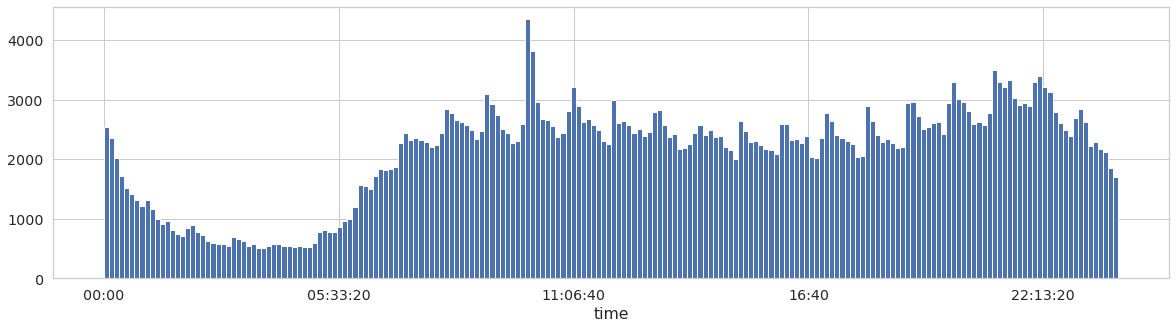

In [ ]:
events_data_filtered_df['time'].hist(bins=200,figsize=(20,5))

The above histogram states that max usage happened between 10-11am.



Replacing Chinese characters with provided English vlaues for Mobile Brands

In [ ]:
device_data_df['Brand'].unique()

array(['酷派', '小米', 'vivo', '三星', '华为', '乐视', '酷比魔方', 'OPPO', '魅族', 'HTC',
       '一加', '努比亚', '亿通', '锤子'], dtype=object)

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('小米','Xiaomi')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('华为','Huawei')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('三星','Samsung')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('魅族','Meizu')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('酷派','Coolpad')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('乐视','LeEco')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('联想 ','Lenovo')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('一加','Other')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('努比亚','Other')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('锤子','Other')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('亿通','Other')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('努比亚','Other')

In [ ]:
device_data_df['Brand'] = device_data_df['Brand'].replace('酷比魔方','Other')

In [ ]:
device_data_df['Brand'].unique()

array(['LeEco', 'Xiaomi', 'vivo', 'Meizu', 'Other', 'OPPO', 'HTC'],
      dtype=object)

In [ ]:
device_data_df['Age'].max()

67

In [ ]:
device_data_df['age_bins']=pd.cut(device_data_df['Age'].dropna(),[10,20,30,40,50,60,70], labels=['10-20','21-30','31-40','41-50','51-60','61-70'], include_lowest=True)

In [ ]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model,age_bins
0,1836426,3872521790238090752,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
1,225132,3872521790238090752,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
2,815723,3872521790238090752,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
3,1300157,3872521790238090752,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
4,233682,3872521790238090752,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20


In [ ]:
device_data_df[device_data_df['age_bins']=='21-30']['Age'].max()

30

In [ ]:
device_data_df['age_bins'].value_counts()

21-30    1549
31-40     608
10-20     265
41-50     187
61-70      29
51-60       3
Name: age_bins, dtype: int64

In [ ]:
device_data_df.isna().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
Gender       0
Age          0
Age_Group    0
Brand        0
Model        0
age_bins     0
dtype: int64

There are no columns with null data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

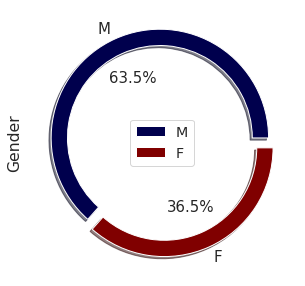

In [ ]:
device_data_df['Gender'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=15, autopct='%3.1f%%',figsize=(5,5), shadow=True, legend=True, wedgeprops=dict(width=0.15), cmap='seismic')
plt.legend(loc='center')
plt.show()

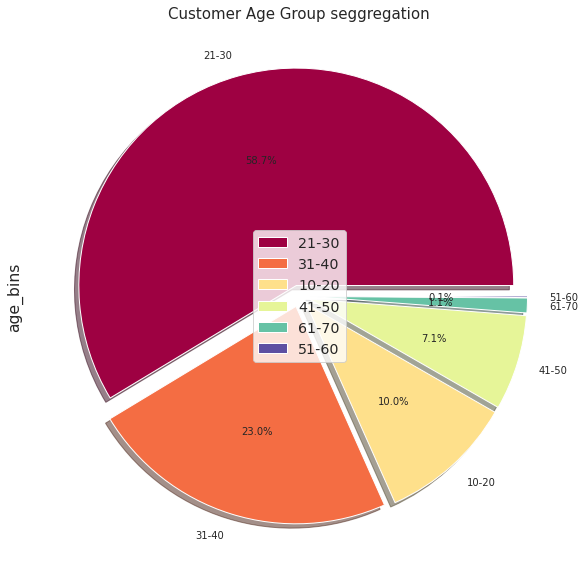

In [ ]:
device_data_df['age_bins'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05],fontsize=10, autopct='%3.1f%%', figsize=(10,10), shadow=True,legend=True, cmap='Spectral')
plt.legend(loc='center')
plt.title('Customer Age Group seggregation',fontsize=15)
plt.show()

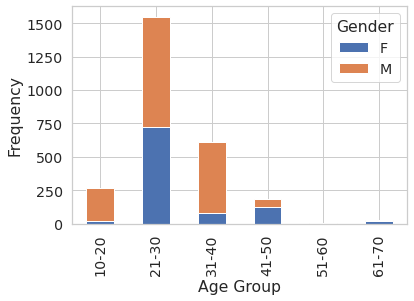

In [ ]:
age_gender = device_data_df.groupby(['age_bins', 'Gender'])['age_bins'].count().unstack('Gender').fillna(0)
age_gender.plot(kind="bar",stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

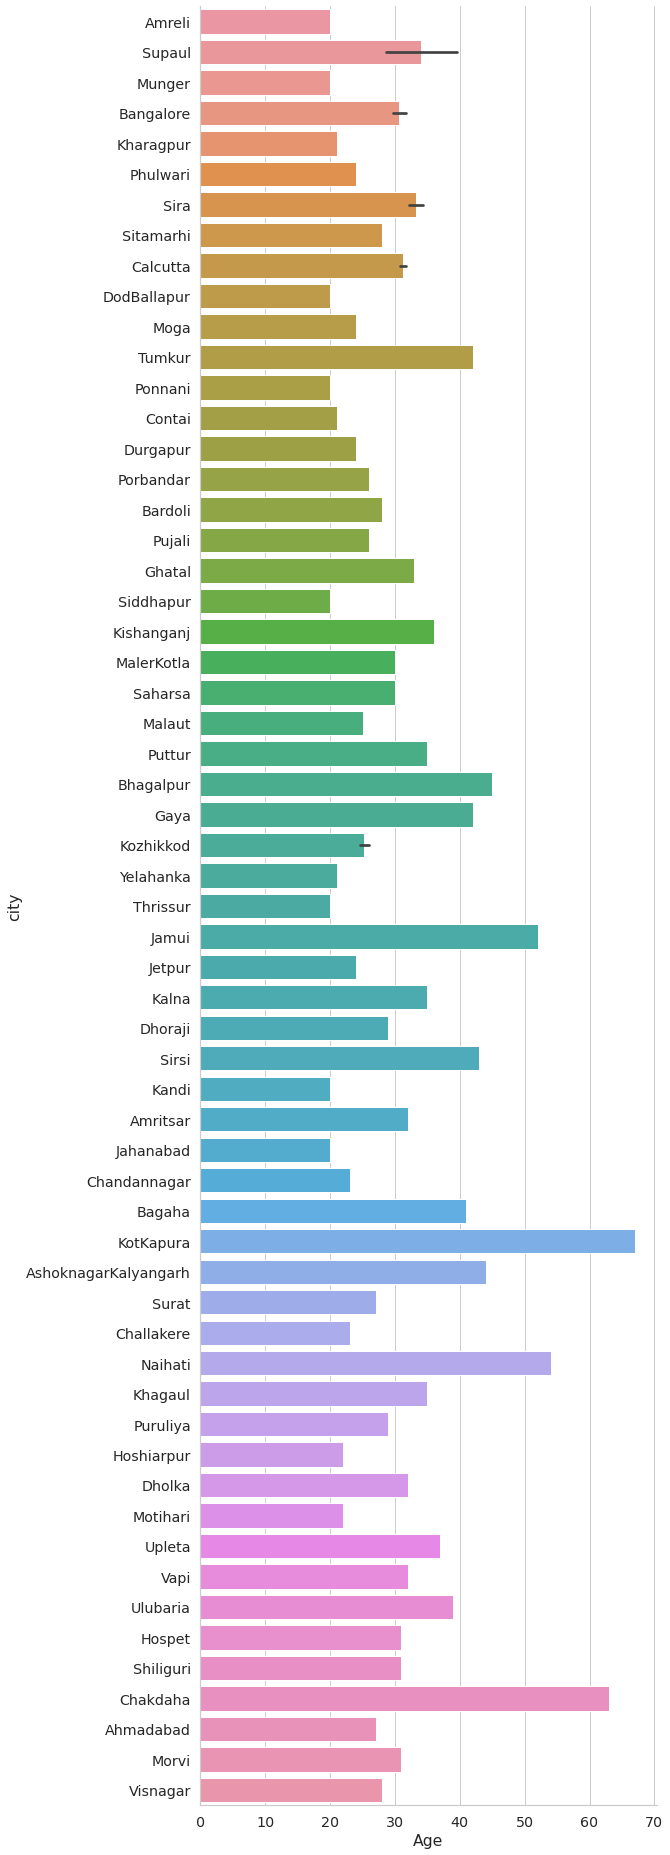

In [ ]:
#Scatter Plot to show age Vs City
sns.catplot(x="Age",y="city", data=device_data_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(15,30)

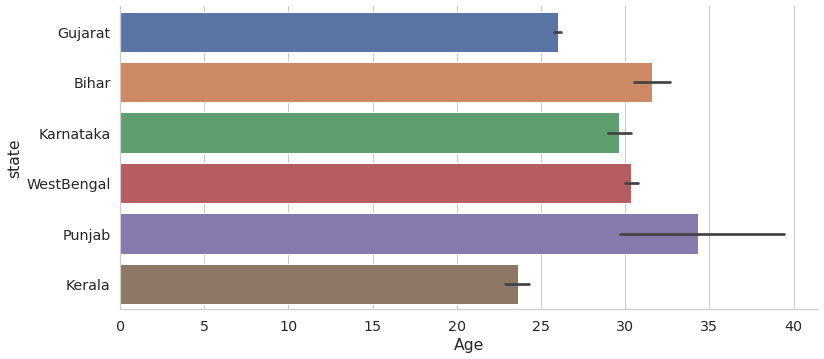

In [ ]:
#Scatter Plot to show age Vs state
sns.catplot(x="Age",y="state", data=device_data_df,kind='bar')
fig=plt.gcf()
fig.set_size_inches(15,5)

In [ ]:
device_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,Gender,Age,Age_Group,Brand,Model,age_bins
0,1836426,3872521790238090752,2016-05-01 20:29:14,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
1,225132,3872521790238090752,2016-05-01 12:52:44,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
2,815723,3872521790238090752,2016-05-01 12:28:56,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
3,1300157,3872521790238090752,2016-05-04 23:24:57,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20
4,233682,3872521790238090752,2016-05-04 19:09:26,71.294802,21.661309,Amreli,Gujarat,M,20,M22-,LeEco,8702,10-20


In [ ]:
device_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2641 entries, 0 to 2640
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   event_id   2641 non-null   int64   
 1   device_id  2641 non-null   int64   
 2   timestamp  2641 non-null   object  
 3   longitude  2641 non-null   float64 
 4   latitude   2641 non-null   float64 
 5   city       2641 non-null   object  
 6   state      2641 non-null   object  
 7   Gender     2641 non-null   object  
 8   Age        2641 non-null   int64   
 9   Age_Group  2641 non-null   object  
 10  Brand      2641 non-null   object  
 11  Model      2641 non-null   object  
 12  age_bins   2641 non-null   category
dtypes: category(1), float64(2), int64(3), object(7)
memory usage: 351.0+ KB


In [ ]:
device_data_df['Brand'].value_counts()

Xiaomi    1310
Meizu      671
LeEco      233
vivo       205
OPPO        95
Other       70
HTC         57
Name: Brand, dtype: int64